<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week13_MarkovIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM5222
# Introduction to Markov Chain Monte Carlo


## Agenda

* Markov processes
* Discrete Case: transition matrices
* Equilibrium state and Perron-Frobrenius Theorem
* Continuous Analogue


We have already talked about Markov Chain Monte Carlo (MCMC) when we used Pymc3 to generate samples from the posterior distribution of the parameters.  But we didn't define MCMC nor did we explain (even in a hand-waving sense) what is going on and why it works.    In this short video, we will lay some of the foundation for that.

## Markov Process


A Markov process is a time-dependant processs where the "future state" probabilities only depend on the current state - not previous states.  


For example, consider the AR(1) process:



$$X_{t} = (1-\phi) \mu + \phi X_{t-1} +  \epsilon_t$$


Here, the outcome probabilities at time $t$ depend only on thee outcome at time $t-1$, so it is a Markov process.


On the other hand, an AR(2) process:

$$X_{t} = (1-\phi) \mu + \phi_1 X_{t-1} + \phi_2 x_{t-2} +  \epsilon_t$$

is not Markovian because the outcome probabilities depend on both the previous state *and* the one before that.



Markov processess are important in finance and many of the models we use are Markov models.   


#### BSM

$$S_{t+\Delta t} = S_{t} e^{\mu \Delta t + \sigma \sqrt{\Delta t} \epsilon_t}$$

Is this a Markov process?



## Discrete Markov Processes


Let's start with an example.    Suppose that a bee hive has only two states:  normal and excited.  In any given hour, the probability that it is "excited" depends on the whether it was excited the previous hour (or not).

In particular, if it was excited, then the probability is it still excited is $.4$.  But if it was not excited, the probability that is now excited is $.1$.  

If we call excited state 2 and not excited state 1, then we can express the transition probabilities as




$$\mathrm{Pr}( 2|1)= T_{2,1} = 0.1$$

and


$$\mathrm{Pr}( 2|2)= T_{2,2} = 0.4$$




But we can also infer that


$$\mathrm{Pr}(1|1)= T_{1,1} = 0.9$$

and

$$\mathrm{Pr}(1|2)= T_{1,2} = 0.6$$


We can define the transition matrix

$$T_{i,j} = \mathrm{Pr}(i|j)$$


Then we can say that if at time $t$, the beehive is in state $\Psi_t$ where $\Psi_t = [1,0]^T$ means "non-excited" and $\Psi_t =[0,1]^T$ means "excited", then the probabilites of each state at time $t+1$ are give by the vector

$$\Psi_{t+1} = T \Psi_t$$

In fact, we can think of the state at time $t$ and being a vector of probabilities (meaning that we aren't necessarily sure which state the beehive is in, but we have probabilities). The stepforward equation is still true.

And in fact, we can see that



$$\Psi_{t+n} = T^n \Psi_t$$


### Transition Matrices

We don't have to have just two  states.  Suppose instead we have $N$ discrete states.  We can define a transition matrix 

$$T_{i,j} = \mathrm{Pr}(i| \text{starting in state }j)$$


What can we say about such a matrix?

1) The sum of the any column is always $1$.   That is $\sum_{i=1}^N T_{i,j} = 1, \forall j$.  This is true because given any $j$, the probabilies of transitioning to *somewhere* have to add up to 1.


2) All of the entries are non-negative.




3) $\lambda = 1$ is an eigenvalue.   To see this, consider the row vector $v_{one} =[1,1,...,1]$ and observe that

$$v_{one} T = v_{one}$$

But for a square matrix, a left eigen-value is also a right eigvalue, it follows that there is a column vector $\Psi^*$ such that

$$\Psi^* = T \Psi^*$$










### Example

Assume that we observe the bee-hive and see that it is not excited at time 0.  Calculate the state probability vectors for $t =1,2, ..., 100$

Plot the vectors in the state-plane.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
T = np.array([[0.9, .6 ], [.1,.4]])

print( T)

psi = np.zeros([2,101])

psi[0,0]  = 1

for k in range(100):
    
    psi[:,k+1] = T@psi[:,k]
    
        


[[0.9 0.6]
 [0.1 0.4]]


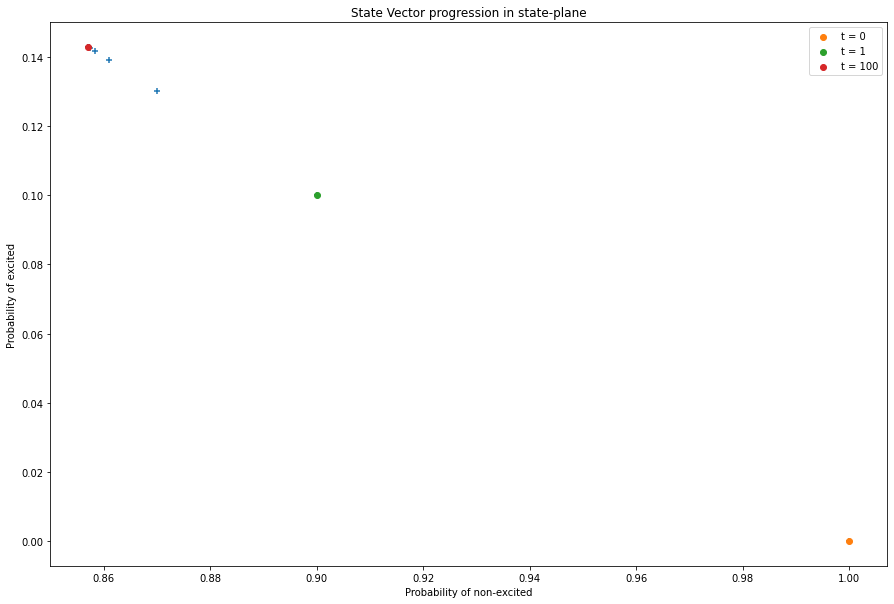

In [ ]:
plt.figure(figsize = (15,10))
plt.scatter(psi[0,:], psi[1,:], marker = '+')

plt.scatter(psi[0,0], psi[1,0], label = "t = 0")

plt.scatter(psi[0,1], psi[1,1], label = "t = 1")

plt.scatter(psi[0,100], psi[1,100], label = "t = 100")


plt.title("State Vector progression in state-plane")

plt.xlabel("Probability of non-excited")

plt.ylabel("Probability of excited")

plt.legend()

plt.show()

Let's fix the dimensions to get a fuller perspective

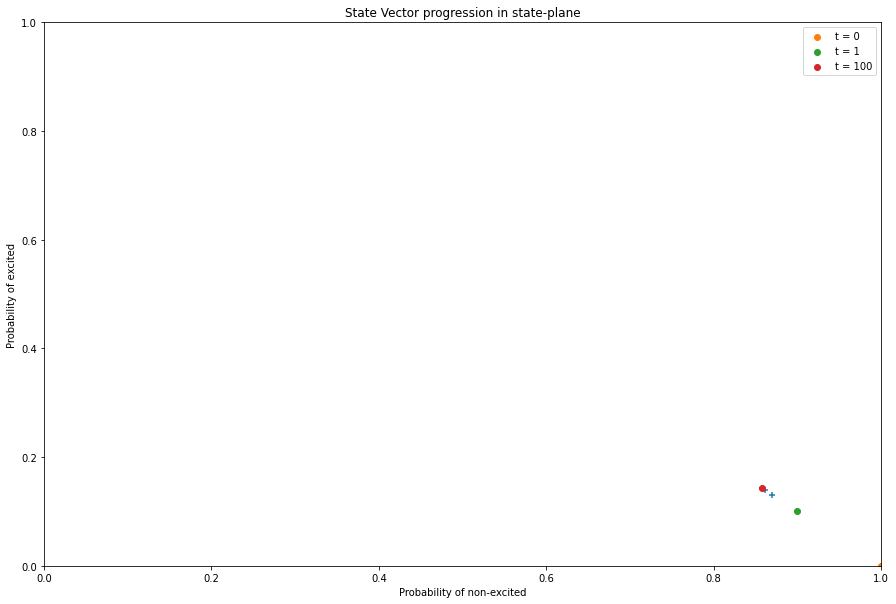

In [ ]:
plt.figure(figsize = (15,10))
plt.scatter(psi[0,:], psi[1,:], marker = '+')

plt.scatter(psi[0,0], psi[1,0], label = "t = 0")

plt.scatter(psi[0,1], psi[1,1], label = "t = 1")

plt.scatter(psi[0,100], psi[1,100], label = "t = 100")

plt.xlim(0,1)

plt.ylim(0,1)


plt.title("State Vector progression in state-plane")

plt.xlabel("Probability of non-excited")

plt.ylabel("Probability of excited")

plt.legend()

plt.show()

We see that things quickly converge to a fixed "steady state".  Let change the starting vector to  excited and see what happens.

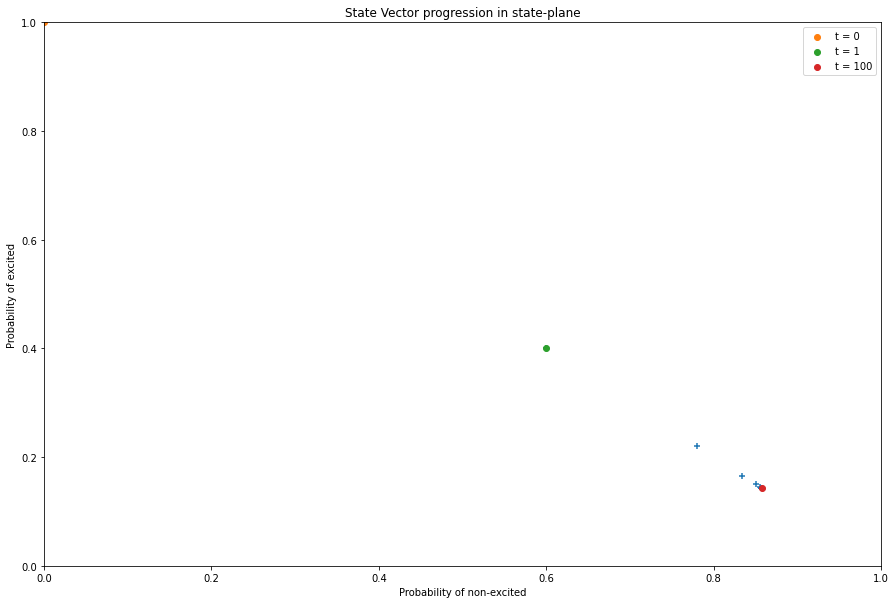

In [ ]:
psi = np.zeros([2,101])

psi[1,0]  = 1

for k in range(100):
    
    psi[:,k+1] = T@psi[:,k]
    
plt.figure(figsize = (15,10))
plt.scatter(psi[0,:], psi[1,:], marker = '+')

plt.scatter(psi[0,0], psi[1,0], label = "t = 0")

plt.scatter(psi[0,1], psi[1,1], label = "t = 1")

plt.scatter(psi[0,100], psi[1,100], label = "t = 100")

plt.xlim(0,1)

plt.ylim(0,1)


plt.title("State Vector progression in state-plane")

plt.xlabel("Probability of non-excited")

plt.ylabel("Probability of excited")

plt.legend()

plt.show()   
    
    

Why is this steady state point?  It's the place where $T\Psi^* = \Psi^*$

We can readily verify by calculating the eigenvectors.

In [ ]:
eig, eigvects = np.linalg.eig(T)

eigvects

array([[ 0.98639392, -0.70710678],
       [ 0.16439899,  0.70710678]])

The first column must be it, but it doesn't add up to one.  But for that, we need only rescale.




In [ ]:
eigvects[:,0]/eigvects[:,0].sum()

array([0.85714286, 0.14285714])

$86\%$ non-exicted and $14\%$ excited is the consistent with the steady-state as we saw from the above

## Perron - Frobenius Theorem

Will this always happen?  Will any starting state probability vector converge to a steady state?  Is the steady state unique?

The answer is provided by the  Perron - Frobenius Theorem.  We just need one more condition on the transition matrix $T$.  We need that for some finite $k$,  $T^k$ has only strictly positive entries.

Such a transition matrix is called "regular".  It simply means that starting from any state, any other state can be reached with positive probability.

The PF theorem tells that, if the transition matrix is regular, then not only is there always and equilibrium state (that right eigenvector $\Psi^*$ with eigen value $1$), but that

1. The equilibrium state $\Psi^*$is unique

and 

2. $T^n \Psi \to \Psi^*$ as $n \to \infty$

## Analogue to continuous case

We can think of the state probability vectors $\Phi$ as probability distributions (they are).   But what about continous probability distributions.  Is there an analogous Markov process that takes a give probability distribution and transforms to an other one?   And does so in a way that converges to a "steady state" distribution?


This is exactly what the MCMC algorithms do in the case of Baysian posteriors.  The stready state distribution is the target distribution.  But we don't get there right away.  That is why we have a burn-in period.



The whole trick in MCMC (for Bayesian analysis) is to construct a Markov process that converges to the distribution we want. In the next video, we will explain how the Metropolis algorithim achieves this.
